In [1]:
# Import the MNIST dataset
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images: ' + str(test_images.shape))
print('test_labels: ' + str(test_labels.shape))

Using TensorFlow backend.


train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


In [2]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

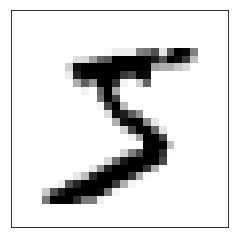

In [3]:
# Plot the first training image
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(train_images[0], cmap=plt.cm.gray_r)

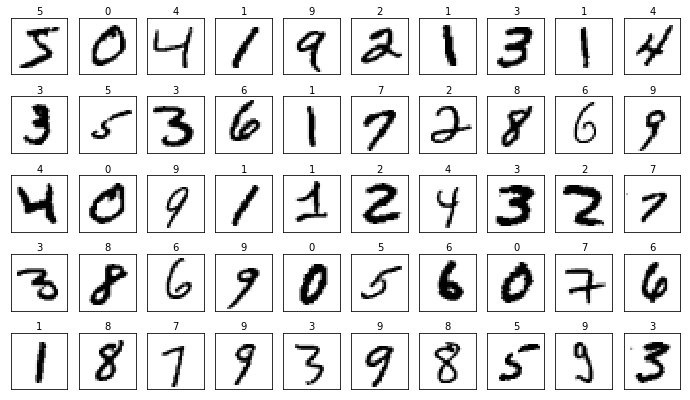

In [4]:
# Plot the first 50 images and show the corresponding labels
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

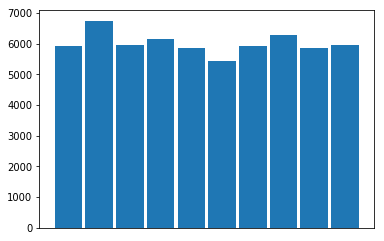

In [5]:
# Plot the distribution of the samples
plt.xticks([])
plt.hist(train_labels, rwidth=0.9)

In [6]:
# Create a neural network with a softmax output layer for classification
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Prepare the input data
from keras.utils import to_categorical

test_image = test_images[47] # Save one image for making a prediction later
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# Train the model
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2539 - acc: 0.9265 - val_loss: 0.1501 - val_acc: 0.9565
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.1035 - acc: 0.9693 - val_loss: 0.0941 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0681 - acc: 0.9796 - val_loss: 0.0756 - val_acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0499 - acc: 0.9850 - val_loss: 0.0661 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0375 - acc: 0.9890 - val_loss: 0.0701 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0288 - acc: 0.9916 - val_loss: 0.0699 - val_acc: 0.9794
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0223 - acc: 0.9931 - val_loss: 0.0706 - 

[]

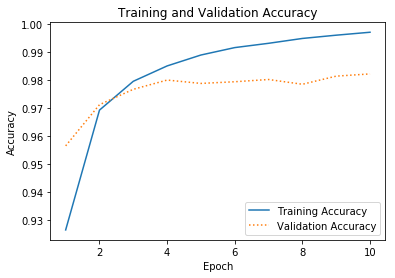

In [9]:
# Show training and validation accuracy over time
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [10]:
# Evaluate the model's accuracy
scores = model.evaluate(test_images, test_labels, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 98.22%


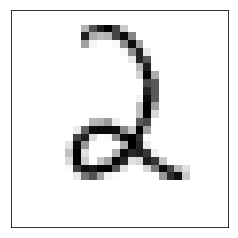

In [11]:
# Show the test image used to make a prediction
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

In [12]:
# Make a prediction using a test image
import numpy as np

test_image = test_images[47]
model.predict(np.array([test_image]))

array([[3.1214719e-17, 8.3672472e-11, 1.0000000e+00, 1.4318815e-12,
        2.6802354e-15, 6.7586288e-15, 7.1372047e-10, 5.6965242e-16,
        7.4324681e-14, 1.1321297e-21]], dtype=float32)

In [13]:
# Get the predicted class
predicted_class = model.predict_classes(np.array([test_image]))[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 2!
